In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
df_raw = pd.read_csv("rawdata/유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 전처리 실시 

지난 번 과제와 동일한 데이터 세트를 사용한다. 지난 번 과제 정보 (결측치 없음, 범주형 변수 없음) 를 바탕으로 전처리를 실시한다. 

In [3]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 42)
print("Train data size\t: {}".format(df_train.shape))
print("Test data size\t: {}".format(df_test.shape))

Train data size	: (398, 31)
Test data size	: (171, 31)


In [4]:
df_train_x = df_train.drop(["diagnosis"], axis = 1)
df_train_y = df_train[["diagnosis"]]
df_test_x = df_test.drop(["diagnosis"], axis = 1)
df_test_y = df_test[["diagnosis"]]

In [11]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y.values.ravel())

print("Accuracy on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

# 과대적합

Accuracy on training set: 1.000
Accuracy on test set: 0.959


In [12]:
train_accuracy = []; test_accuracy = []

para_lr = [lr * 0.1 for lr in range (1, 30)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y.values.ravel())
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,1.000,0.959
1,0.2,1.000,0.959
2,0.3,1.000,0.953
3,0.4,1.000,0.959
4,0.5,1.000,0.959
5,0.6,1.000,0.959
6,0.7,1.000,0.959
7,0.8,1.000,0.965
8,0.9,1.000,0.953
9,1.0,1.000,0.936


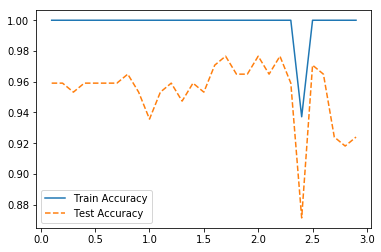

In [13]:
plt.plot(para_lr, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [15]:
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 30)]

for v_n_estimator in para_n_tree:
    rf = GradientBoostingClassifier(learning_rate = 1.7, n_estimators = v_n_estimator, random_state = 1234)
    rf.fit(df_train_x, df_train_y.values.ravel())
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimator"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

df_accuracy_n.round(3)

,n_estimator,TrainAccuracy,TestAccuracy
0,10,1.0,0.965
1,20,1.0,0.971
2,30,1.0,0.977
3,40,1.0,0.977
4,50,1.0,0.977
5,60,1.0,0.977
6,70,1.0,0.977
7,80,1.0,0.977
8,90,1.0,0.977
9,100,1.0,0.977


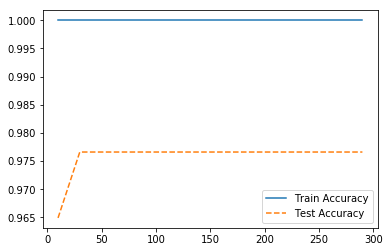

In [16]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [20]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range (1, 21)]

for v_max_depth in para_depth:
    rf = GradientBoostingClassifier(learning_rate = 1.7, n_estimators = 100, max_depth = v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y.values.ravel())
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.985,0.936
1,2,1.000,0.924
2,3,1.000,0.977
3,4,1.000,0.959
4,5,1.000,0.959
5,6,1.000,0.953
6,7,1.000,0.936
7,8,1.000,0.936
8,9,1.000,0.936
9,10,1.000,0.936


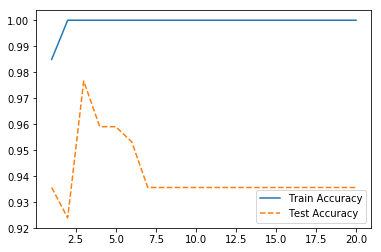

In [21]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [23]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 10 for n_split in range (2, 16)]

for v_min_samples_split in para_split:
    rf = GradientBoostingClassifier(min_samples_split = v_min_samples_split, learning_rate = 1.7, 
                                    n_estimators = 100, 
                                    max_depth = 3, random_state = 1234)
    rf.fit(df_train_x, df_train_y.values.ravel())
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,1.0,0.959
1,30,1.0,0.965
2,40,1.0,0.959
3,50,1.0,0.953
4,60,1.0,0.953
5,70,1.0,0.953
6,80,1.0,0.953
7,90,1.0,0.953
8,100,1.0,0.965
9,110,1.0,0.977


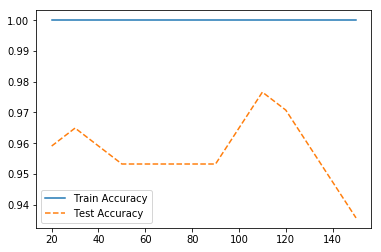

In [24]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [26]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 10 for n_leaf in range (1, 16)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 110, 
                                    learning_rate = 1.7,
                                    n_estimators = 100, max_depth = 3, random_state = 1234)
    rf.fit(df_train_x, df_train_y.values.ravel())
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesSplit"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,1.000,0.965
1,20,0.967,0.924
2,30,1.000,0.971
3,40,1.000,0.965
4,50,0.819,0.825
5,60,0.922,0.918
6,70,1.000,0.965
7,80,1.000,0.953
8,90,1.000,0.977
9,100,1.000,0.982


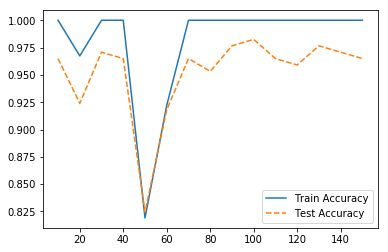

In [27]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [30]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 90, min_samples_split = 110, learning_rate = 1.7,
                                    n_estimators = 100, max_depth = 3, random_state = 1234)

gb_final.fit(df_train_x, df_train_y.values.ravel())
y_pred = gb_final.predict(df_test_x)

print("Accuracy on")
print("Uncustomzed\t training: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Uncustomzed\t test\t : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
print("Tunned\t\t training: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Tunned\t\t test\t : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Accuracy on
Uncustomzed	 training: 1.000
Uncustomzed	 test	 : 0.959
Tunned		 training: 1.000
Tunned		 test	 : 0.977


In [31]:
print("Confusion matrix")
print(confusion_matrix(df_test_y, y_pred))

Confusion matrix
[[107   1]
 [  3  60]]


In [33]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.head().round(3)

,Feature,Importance
7,mean concave points,0.816
26,worst concavity,0.051
21,worst texture,0.027
12,perimeter error,0.016
5,mean compactness,0.015


Text(0, 0.5, 'Feature')

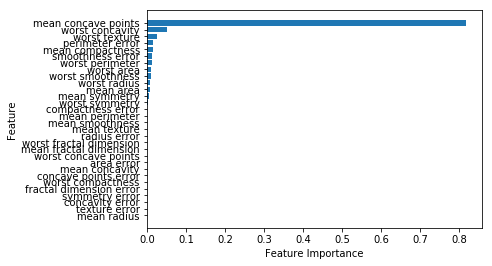

In [34]:
df_importance.sort_values("Importance", ascending= True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

In [36]:
estimator = GradientBoostingClassifier(random_state = 1234)

param_grid = {
    "learning_rate"    : para_lr,
    "max_depth"        : para_depth,
    "min_samples_leaf" : para_leaf,
}

grid_gb = GridSearchCV(estimator, param_grid, scoring= "accuracy", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y.values.ravel())
print("Best estimator model:")
print(grid_gb.best_estimator_)
print("\nBest parameter:")
print(grid_gb.best_params_)
print("\nBest score:")
print(grid_gb.best_score_.round(3))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.8, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Best parameter:
{'learning_rate': 1.8, 'max_depth': 2, 'min_samples_leaf': 20}

Best score:
0.977


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 10, 
                                n_estimators = 100, max_depth = 3, random_state = 42)

gb_final.fit(df_train_x, df_train_y.values.ravel())
y_pred = gb_final.predict(df_test_x)

print("Accuracy on")
print("Uncustomzed\t training: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Uncustomzed\t test\t : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
print("Tunned\t\t training: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Tunned\t\t test\t : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Accuracy on
Uncustomzed	 training: 1.000
Uncustomzed	 test	 : 0.959
Tunned		 training: 1.000
Tunned		 test	 : 0.965
